# Análise Exploratória de Dados dos Filmes Star Wars
**Objetivo**: Explorar os dados relacionados aos filmes da franquia Star Wars, enriquecidos pela API OMDb, para gerar insights de Crtica e avaliação.

**Ferramentas**: Python, SQLAlchemy, Pandas, Numpy Matplotlib, Seaborn, MySQL.


In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sqlalchemy import create_engine

# Configuração para visualizações
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Configuração do banco de dados MySQL
DB_USERNAME = "root"
DB_PASSWORD = "123456"
DB_HOST = "localhost"
DB_PORT = "3306"
DB_NAME = "star_wars"

# Criação da engine do SQLAlchemy
engine = create_engine(f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Testando a conexão
try:
    with engine.connect() as conn:
        print("Conexão com o banco de dados bem-sucedida!")
except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")


Conexão com o banco de dados bem-sucedida!


In [3]:
# Consultando os dados da tabela de filmes
query = """
SELECT 
    title, imdbRating, tomatoesRating,  Metascore, imdbVotes, awards, release_date 
FROM star_wars.films order by release_date ASC;
"""
df_films = pd.read_sql(query, con=engine)


#### Premiações de oscar

In [4]:

df_awards = df_films[['title', 'awards']]

# Extraindo número de prêmios
df_awards['num_awards'] = df_awards['awards'].str.extract(r'(\d+)').astype(int)
df_awards.sort_values(by='num_awards', ascending=False, inplace=True)
df_awards.reset_index(inplace=True)

C:\Users\feleite\AppData\Local\Temp\ipykernel_4024\2159889807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_awards['num_awards'] = df_awards['awards'].str.extract(r'(\d+)').astype(int)
C:\Users\feleite\AppData\Local\Temp\ipykernel_4024\2159889807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_awards.sort_values(by='num_awards', ascending=False, inplace=True)


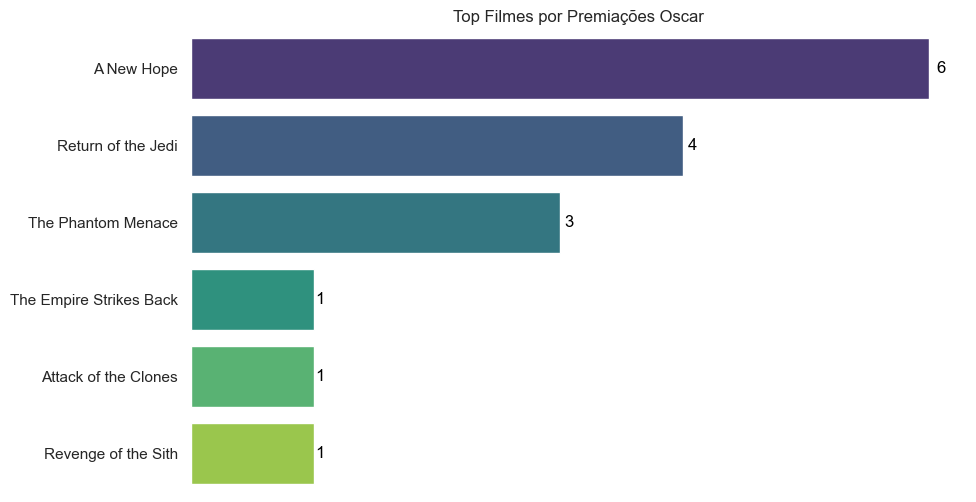

In [6]:

fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="num_awards", y="title", data=df_awards, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    awards = f"{df_awards['num_awards'][index]:.0f}"
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{awards}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )
    
plt.title("Top Filmes por Premiações Oscar")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()

#### Comparação entre avaliações

In [ ]:
df_ratings = df_films[['title', 'imdbRating', 'tomatoesRating','Metascore']]


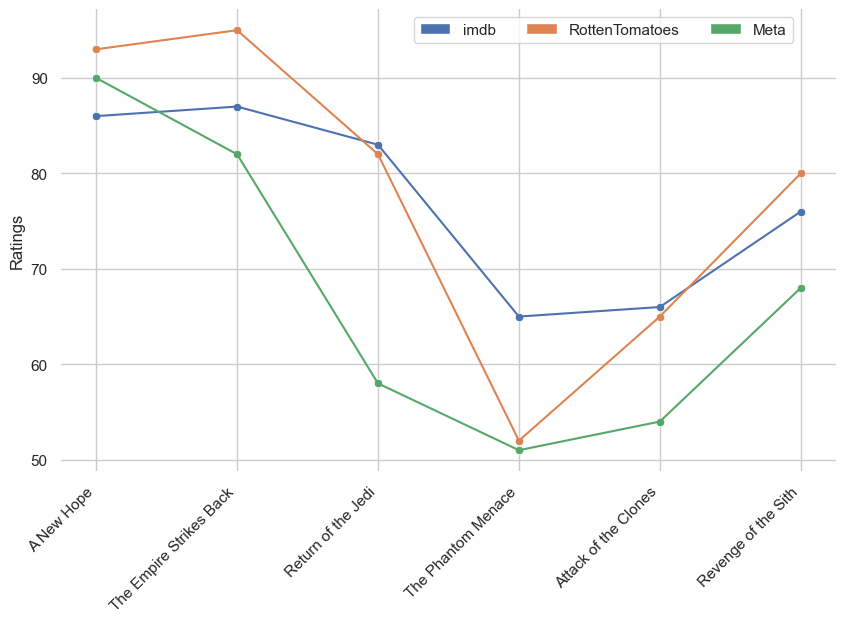

In [ ]:

lines = []
ax = sns.lineplot(x='title', y='imdbRating',data=df_ratings)
ax1 = sns.lineplot(x='title', y='tomatoesRating',data=df_ratings)
ax2 = sns.lineplot(x='title', y='Metascore',data=df_ratings)

lines = [ax.get_lines(), ax1.get_lines(), ax2.get_lines()]

sns.scatterplot(x='title', y='imdbRating',data=df_ratings)
sns.scatterplot(x='title', y='tomatoesRating',data=df_ratings)
sns.scatterplot(x='title', y='Metascore',data=df_ratings)

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Ratings')

legend_elements = []
rating_types =['imdb', 'RottenTomatoes','Meta']
for i,line in enumerate(lines):
    color = line[i].get_color()
    patch = mpatches.Patch(facecolor=color, label=rating_types[i])
    legend_elements.append(patch)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.7, 1), ncol=len(legend_elements))

ax.spines[['top','right','left','bottom']].set_visible(False)
plt.show()

##### Ranking de melhores avaliações
Média entre avaliadores

In [ ]:
df_awards = df_films[['title', 'imdbRating', 'tomatoesRating','Metascore']]
df_awards =  df_awards.melt(id_vars='title', var_name='ratingType', value_name='rating')
df_awards = df_awards.groupby('title')['rating'].mean().reset_index()

df_awards.sort_values( by='rating', ascending=False, inplace=True)
df_awards.reset_index(inplace=True)


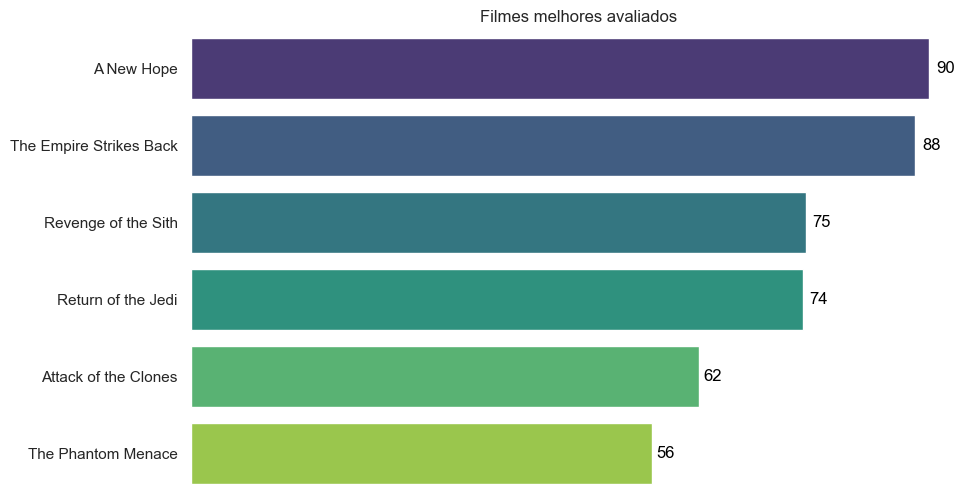

In [ ]:

fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="rating", y="title", data=df_awards, palette="viridis", hue="title")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    awards = f"{df_awards['rating'][index]:.0f}"
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{awards}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )
    
plt.title("Filmes melhores avaliados")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()